# Comparing matrix inversion v. solving

KX = Y

where K is pretty big, X is pretty big, and Y is pretty big. We're solving for X

In [1]:
# Set up matrix K and Y
import numpy as np
from scipy.linalg import solve
from numpy.linalg import inv
import time
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
n = 1000
K = np.random.randn(n, n)
K = K.dot(K.T)
Y = np.random.randn(n, n)

In [3]:
def generate(n):
    K = np.random.randn(n, n)
    K = K.dot(K.T)
    Y = np.random.randn(n, n)
    return K, Y

In [4]:
def solve_by_inv(K, Y):
    # Solve by matrix inversion
    t = time.time()
    X = inv(K).dot(Y)
    t = time.time() - t
    err = abs(K.dot(X) - Y).mean()
    return err, t

In [5]:
def solve_by_sol(K, Y):
    # Solve by matrix inversion
    t = time.time()
    X = solve(K, Y, sym_pos=True)
    t = time.time() - t
    err = abs(K.dot(X) - Y).mean()
    return err, t    

In [6]:
# Solve by matrix inversion
err, t = solve_by_inv(K, Y)
print "Solution check:", err
print "Computation time:", t

Solution check: 2.55433963354e-11
Computation time: 0.166968822479


In [7]:
# Solve by solving
err, t = solve_by_sol(K, Y)
print "Solution check:", err
print "Computation time:", t

Solution check: 1.64575786881e-11
Computation time: 0.114394187927


In [14]:
ns = np.power(10, np.linspace(1, 3.5, num=10)).astype(int)
trials = 3
inv_err = np.zeros(trials*len(ns))
sol_err = np.zeros(trials*len(ns))
inv_t = np.zeros(trials*len(ns))
sol_t = np.zeros(trials*len(ns))
x = np.zeros(trials*len(ns))

i = 0
for n in ns:
    print n
    for _ in xrange(trials):
        K, Y = generate(n)
        err1, t1 = solve_by_inv(K, Y)
        err2, t2 = solve_by_sol(K, Y)
        inv_err[i] = err1
        sol_err[i] = err2
        inv_t[i] = t1
        sol_t[i] = t2
        x[i] = n
        i += 1
        print "*"*80
        print "Error:", err1, "\t", err2
        print "Time:", t1, "\t", t2

10
********************************************************************************
Error: 4.42049175042e-15 	3.43683415061e-15
Time: 9.20295715332e-05 	0.0001060962677
********************************************************************************
Error: 3.29209819128e-13 	1.7948229708e-13
Time: 3.09944152832e-05 	6.29425048828e-05
********************************************************************************
Error: 4.79287616539e-15 	3.7774384315e-15
Time: 2.88486480713e-05 	5.79357147217e-05
18
********************************************************************************
Error: 8.63665575662e-14 	5.66552234493e-14
Time: 4.10079956055e-05 	7.20024108887e-05
********************************************************************************
Error: 1.8808092381e-13 	1.27801132187e-13
Time: 3.50475311279e-05 	6.07967376709e-05
********************************************************************************
Error: 5.53955163847e-15 	2.85114786932e-15
Time: 3.40938568115e-05 	6.0081481

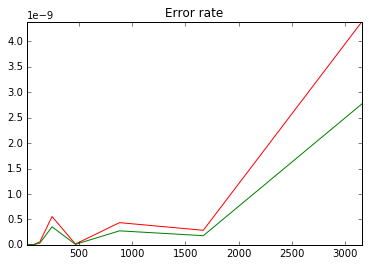

In [15]:
y1 = np.array([inv_err[x == n].mean() for n in ns])
y2 = np.array([sol_err[x == n].mean() for n in ns])
plt.axis((x.min(), x.max(), 0, max(y1.max(),y2.max())))
plt.plot(ns, y1, color='r')
plt.plot(ns, y2, color='g')
plt.title("Error rate")
plt.show()

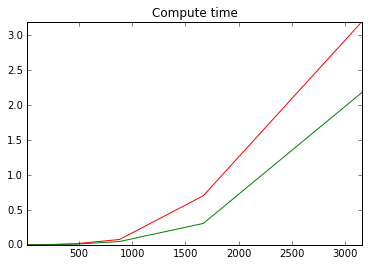

In [16]:
y1 = np.array([inv_t[x == n].mean() for n in ns])
y2 = np.array([sol_t[x == n].mean() for n in ns])
plt.axis((x.min(), x.max(), 0, max(y1.max(),y2.max())))
plt.plot(ns, y1, color='r')
plt.plot(ns, y2, color='g')
plt.title("Compute time")
plt.show()